# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [65]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_metadata_study_results = pd.merge(study_results, mouse_metadata, how='outer', on="Mouse ID")

# Display the data table for preview
mouse_metadata_study_results.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [8]:
# Checking the number of mice.
mouse_count = len(mouse_metadata_study_results['Mouse ID'].unique()) 
mouse_count


249

In [25]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_id = mouse_metadata_study_results[mouse_metadata_study_results.duplicated(["Mouse ID","Timepoint"])]['Mouse ID'].unique()
duplicate_mouse_id 

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [26]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_complete = mouse_metadata_study_results[mouse_metadata_study_results["Mouse ID"].isin(duplicate_mouse_id) == False]
clean_study_complete 


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [28]:
# Checking the number of mice in the clean DataFrame.
len(clean_study_complete["Mouse ID"].unique())


248

## Summary Statistics

In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = clean_study_complete.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median = clean_study_complete.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variance = clean_study_complete.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
standard_deviation = clean_study_complete.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
sems = clean_study_complete.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_table = pd.DataFrame ({ "mean":mean, "median": median, "variance":variance, "Standard_Deviation":standard_deviation,"sem":sems})
summary_table



,mean,median,variance,Standard_Deviation,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [36]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
summary_table = clean_study_complete.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
summary_table
# Using the aggregation method, produce the same summary statistics in a single line.


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

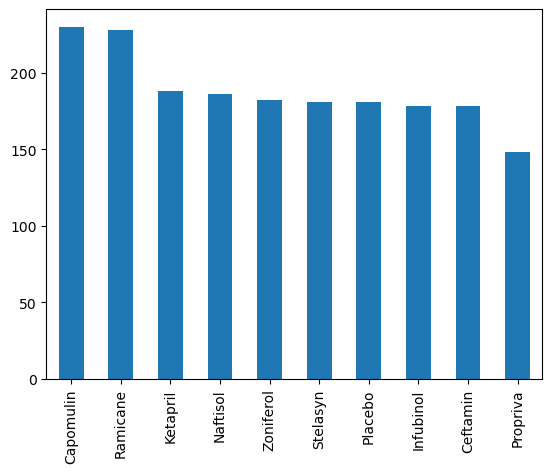

In [40]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
counts = clean_study_complete["Drug Regimen"].value_counts()
counts.plot(kind="bar")
plt.show()


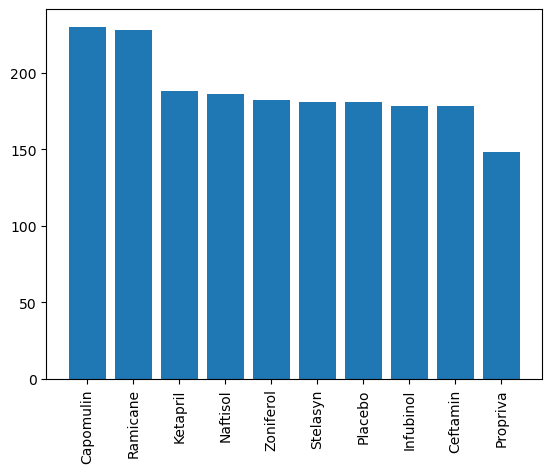

In [41]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

count = clean_study_complete["Drug Regimen"].value_counts()
plt.bar(count.index.values,count.values)
plt.xticks(rotation = 90)
plt.show()

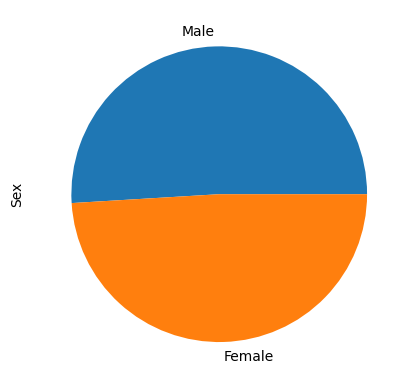

In [42]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
female_male = clean_study_complete["Sex"].value_counts()
female_male.plot(kind="pie")
plt.show()


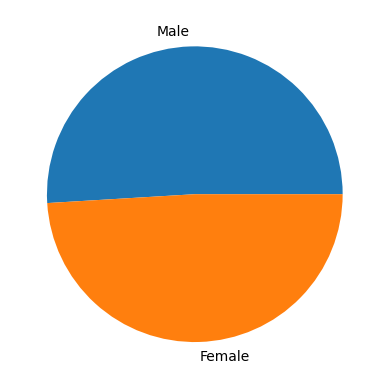

In [44]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
female_males = clean_study_complete["Sex"].value_counts()
plt.pie(female_male.values,labels=female_male.index.values)
plt.show()



## Quartiles, Outliers and Boxplots

In [48]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_study_complete.groupby(["Mouse ID"])["Timepoint"].max()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_df = pd.DataFrame(last_timepoint)
last_df = pd.merge(clean_study_complete, last_timepoint_df, on=('Mouse ID', 'Timepoint'), how='right')
last_df



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [77]:
# Put treatments into a list for for loop (and later for plot labels)
treatments =["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
Capomulin = []
Ramicane = []
Infubinol = []
Ceftamin =[]    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in last_df.iterrows():
    if row["Drug Regimen"] == "Capomulin":Capomulin.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == "Ramicane":Ramicane.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == "Infubinol":Infubinol.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == "Ceftamin":Ceftamin.append(row['Tumor Volume (mm3)'])
       
    # add subset 
drug_df = pd.DataFrame({treatments[0]: Capomulin,
                       treatments[1]: Ramicane,
                       treatments[2]: Infubinol,
                       treatments[3]: Ceftamin
                       })

    

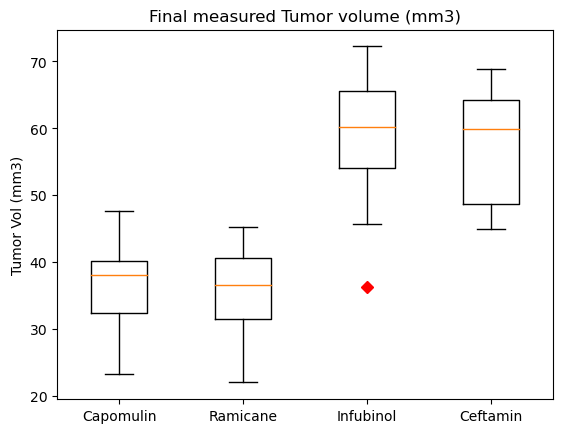

In [58]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

boxplot_list = [drug_df[treatments[0]],
                drug_df[treatments[1]],
                drug_df[treatments[2]],
                drug_df[treatments[3]]
               ]
fig1, ax = plt.subplots()
ax.set_title('Final measured Tumor volume (mm3)') 
ax.set_ylabel('Tumor Vol (mm3)') 
ax.boxplot(boxplot_list, 0, 'rD')
plt.xticks([1,2,3,4], treatments) 
plt.show()

## Line and Scatter Plots

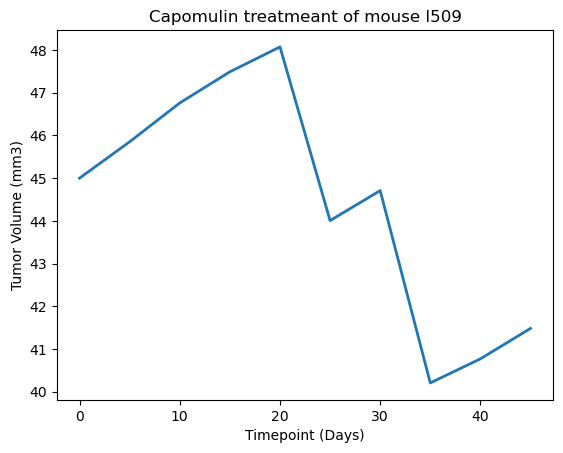

In [62]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

line_df = clean_study_complete.loc[clean_study_complete["Mouse ID"] == "l509"]
line_df
x_axis = line_df["Timepoint"] 
y_axis = line_df["Tumor Volume (mm3)"]  
plt.plot(x_axis, y_axis,linewidth=2, markersize=12) 
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatmeant of mouse l509')
plt.show()

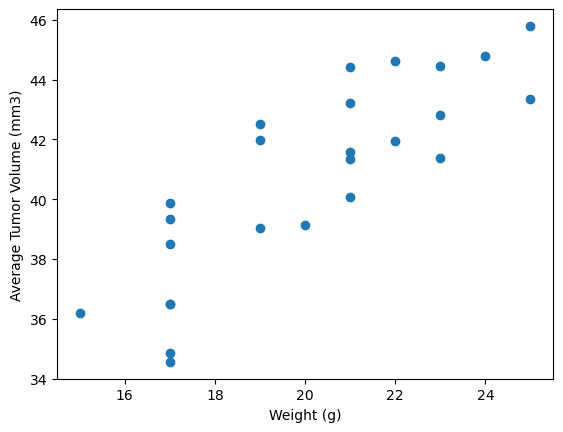

In [63]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = clean_study_complete.loc[clean_study_complete["Drug Regimen"] == "Capomulin"]
capomulin_avg = capomulin_df.groupby(['Mouse ID']).mean()
plt.scatter(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()



## Correlation and Regression

In [70]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")



The correlation between mouse weight and average tumor volume is 0.84


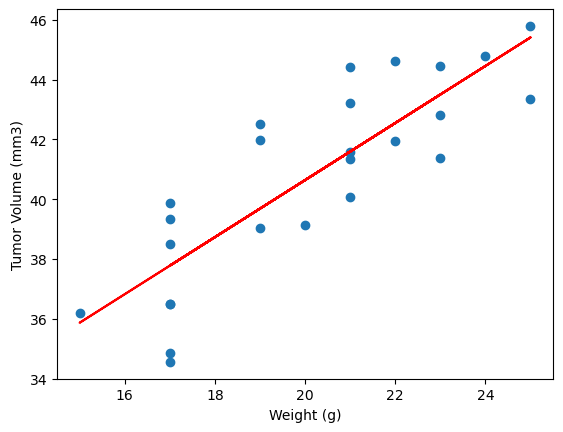

In [75]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])
regress_values = x_axis * slope + intercept
line_eq = slope*(capomulin_avg['Weight (g)'])+intercept

plt.figure
plt.scatter(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])
plt.plot(capomulin_avg['Weight (g)'], line_eq, 'r')

plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()



